In [5]:
import os
import pandas as pd
import numpy as np
# import dataframe as df
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

import torchmetrics
from torchmetrics.functional import accuracy

import pytorch_lightning as pl
from pytorch_lightning.loggers import TensorBoardLogger
from pytorch_lightning.callbacks import ModelCheckpoint

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

import seaborn as sns

cuda


In [6]:
X_train = pd.read_csv('../data2.csv')

In [7]:
X_train.head()
X_train.shape
X_train.info()
print(X_train.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14424064 entries, 0 to 14424063
Data columns (total 44 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    int64  
 1   id      int64  
 2   group   int64  
 3   state   object 
 4   HEOL    float64
 5   HEOR    float64
 6   FP1     float64
 7   FP2     float64
 8   VEOU    float64
 9   VEOL    float64
 10  F7      float64
 11  F3      float64
 12  FZ      float64
 13  F4      float64
 14  F8      float64
 15  FT7     float64
 16  FC3     float64
 17  FCZ     float64
 18  FC4     float64
 19  FT8     float64
 20  T3      float64
 21  C3      float64
 22  CZ      float64
 23  C4      float64
 24  T4      float64
 25  TP7     float64
 26  CP3     float64
 27  CPZ     float64
 28  CP4     float64
 29  TP8     float64
 30  A1      float64
 31  T5      float64
 32  P3      float64
 33  PZ      float64
 34  P4      float64
 35  T6      float64
 36  A2      float64
 37  O1      float64
 38  OZ      float64
 39  O2      float64
 40

In [8]:
import matplotlib.pyplot as plt
# %matplotlib qt
%matplotlib inline

hello = X_train.drop(columns=['time', 'id', 'group', 'state'])
# hello.boxplot()

In [9]:
# Plot EEG Distrobution

FEATURE_COLUMNS = hello.columns.to_list() 

# plt.figure(1)
# plt.subplots_adjust(hspace=0.5)

# for c in FEATURE_COLUMNS:
#     print(c)
#     plt.hist(hello[c], color='skyblue', edgecolor='orange')
#     plt.xlabel(c)
#     plt.ylabel('Frequency')
#     plt.show()

## Correlation Matrix

In [12]:
corr = hello.corr()

<AxesSubplot:>

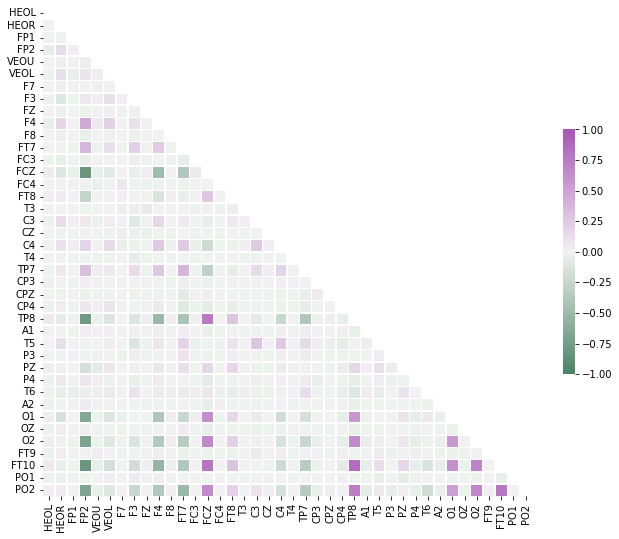

In [13]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.color_palette("coolwarm", as_cmap=True)   # for getting colors clostest 1 and -1
# cmap = sns.color_palette("hls", 8) # for separting colorts
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})

## Feature Extraction

In [ ]:
rm_list = []
hello = X_train.drop(columns=['time', 'id', 'group', 'state'])

n = 0
while(FEATURE_COLUMNS):
    print("-----Round:", n, "-----") 
    
    corr = hello.corr()
    corr_list = []
    FEATURE_COLUMNS = corr.columns.tolist()
    print(FEATURE_COLUMNS)
    
    for i in FEATURE_COLUMNS:
        for j in FEATURE_COLUMNS:
            if i == j:
                pass
            elif FEATURE_COLUMNS.index(i) >= FEATURE_COLUMNS.index(j):
                pass
            else:
                corr_list.append([corr[i][j], i, j])

    corr_df = pd.DataFrame(corr_list, columns=['value', 'C1', 'C2'])        
    corr_df = corr_df.reindex(corr_df.value.abs().sort_values().index)
    print(corr_df.info)
    
    if not corr_df.empty:
        print(corr_df.iloc[-1]['C1'] in FEATURE_COLUMNS)
        hello = hello.drop(columns=[corr_df.iloc[-1]['C1']])
        rm_list.append(corr_df.iloc[-1]['C1'])
    print("rm_list:", rm_list)
    
    n = n + 1
    
print("-------end--------")
print("rm_list:", rm_list)

In [ ]:
# Greedy algorithm to pick elimiate 
['TP8', 'FP2', 'FCZ', 'FT10', 'O2', 'O1', 'FT7', 'F4', 'TP7', 'C3', 'C4', 'F3', 'FT8', 'T6', 'HEOR', 'T5', 'VEOL', 'F7', 'FZ', 'VEOU', 'A1', 'P3', 'PZ', 'CP3', 'P4', 'CPZ', 'A2', 'HEOL', 'CP4', 'FT9', 'F8', 'OZ', 'CZ', 'FC4', 'FC3', 'FP1', 'PO1', 'T3', 'T4', 'PO2']

In [ ]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
# cmap = sns.color_palette("coolwarm", as_cmap=True)   # for getting colors clostest 1 and -1
# cmap = sns.color_palette("hls", 8) # for separting colorts
cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            vmin=-1, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": 0.5})
